In [1]:
from plot_utils import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import os

In [2]:
data_path = '../data'
model_ext = 'r50'
split = 'train'


In [3]:
# read dims

class_dims_path = os.path.join(data_path, f'imagenet_{model_ext}_train', f'class_dims_{split}.pkl')
class_dims_2nn, class_dims_pca90, class_dims_pca95, class_dims_pca99 = pickle.load(open(class_dims_path.format(split=split), 'rb'))


In [4]:
#  read accs

accs_path_l2 = os.path.join(data_path, f'imagenet_{model_ext}_train', f'classwise_acc_l2.pkl')
accs_l2 = pickle.load(open(accs_path_l2, 'rb'))

accs_path_linf = os.path.join(data_path, f'imagenet_{model_ext}_train', f'classwise_acc_linf.pkl')
accs_linf = pickle.load(open(accs_path_linf, 'rb'))

accs_path_clean = os.path.join(data_path, f'imagenet_{model_ext}_train', f'classwise_acc_None.pkl')
accs_clean = pickle.load(open(accs_path_clean, 'rb'))


In [5]:
# dataframe with columns: class, accs: [clean, l2, linf], dims: [2nn, pca90, pca95, pca99]

df = pd.DataFrame(index=np.arange(1000),columns=['class', 'acc_clean', 'acc_l2', 'acc_linf', 'dim_2nn', 'dim_pca90', 'dim_pca95', 'dim_pca99'])

df['class'] = np.arange(1000)
df['acc_clean'] = accs_clean
df['acc_l2'] = accs_l2
df['acc_linf'] = accs_linf
df['dim_2nn'] = class_dims_2nn
df['dim_pca90'] = class_dims_pca90
df['dim_pca95'] = class_dims_pca95
df['dim_pca99'] = class_dims_pca99

In [6]:
df

,class,acc_clean,acc_l2,acc_linf,dim_2nn,dim_pca90,dim_pca95,dim_pca99
0,0,0.96,0.38,0.12,23.333513,232,367,688
1,1,0.96,0.14,0.02,27.702543,284,421,726
2,2,0.82,0.02,0.00,22.180889,211,337,644
3,3,0.90,0.10,0.00,26.034627,214,343,658
4,4,0.92,0.00,0.00,22.784051,226,344,642
...,...,...,...,...,...,...,...,...
995,995,1.00,0.26,0.02,26.724635,225,346,638
996,996,0.90,0.04,0.00,21.071034,226,351,639
997,997,0.78,0.02,0.00,23.485765,232,357,654
998,998,0.52,0.00,0.00,19.742150,292,435,740


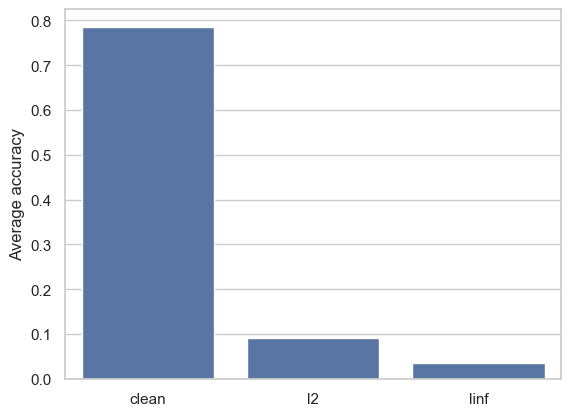

In [7]:
avg_accs = df[['acc_clean', 'acc_l2', 'acc_linf']].mean()
x_labs = ['clean', 'l2', 'linf']
sns.set(style='whitegrid')
sns.barplot(x=x_labs, y=avg_accs.values)
plt.ylabel('Average accuracy')
plt.show()


## Classifier Performance and CAM Dims

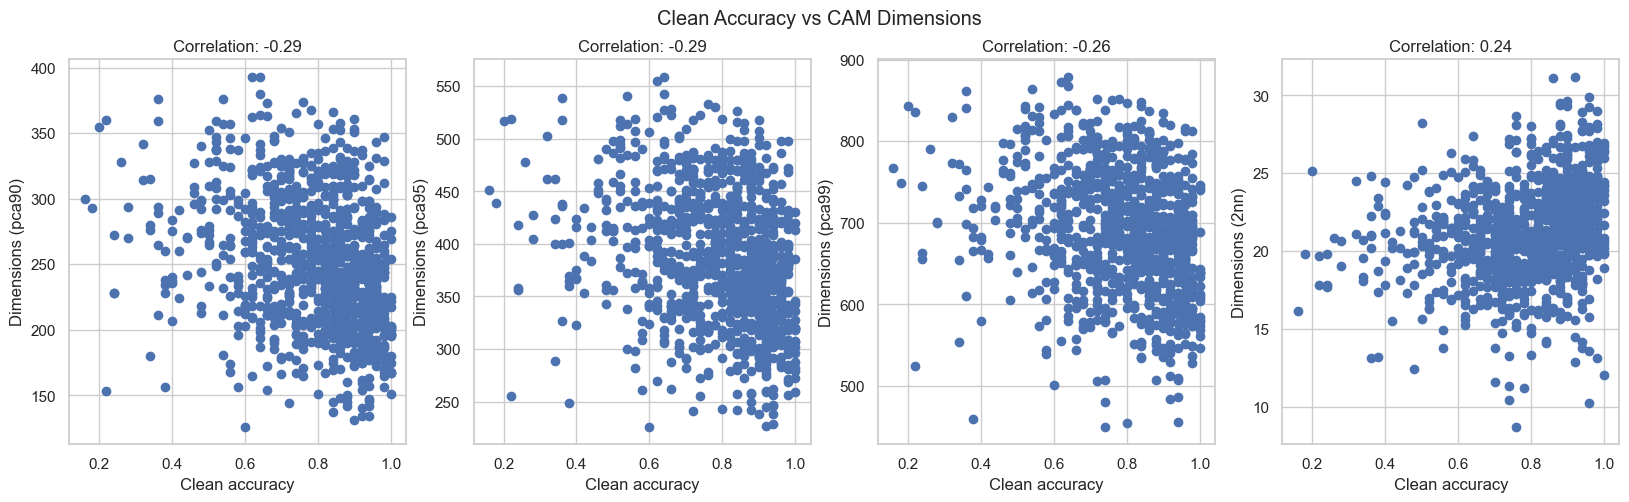

In [12]:
# plot 2 - clean acc vs dims (pca90, pca95, pca99, pca2nn) in 4 subplots

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
x_labs = ['pca90', 'pca95', 'pca99', '2nn']
for i, ax in enumerate(axs):
    ax.scatter(df['acc_clean'], df['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('Clean accuracy')
    corr = np.corrcoef(df['acc_clean'], df['dim_'+x_labs[i]])[0, 1]
    ax.set_title(f'Correlation: {corr:.2f}')

    
plt.suptitle('Clean Accuracy vs CAM Dimensions')
plt.show()

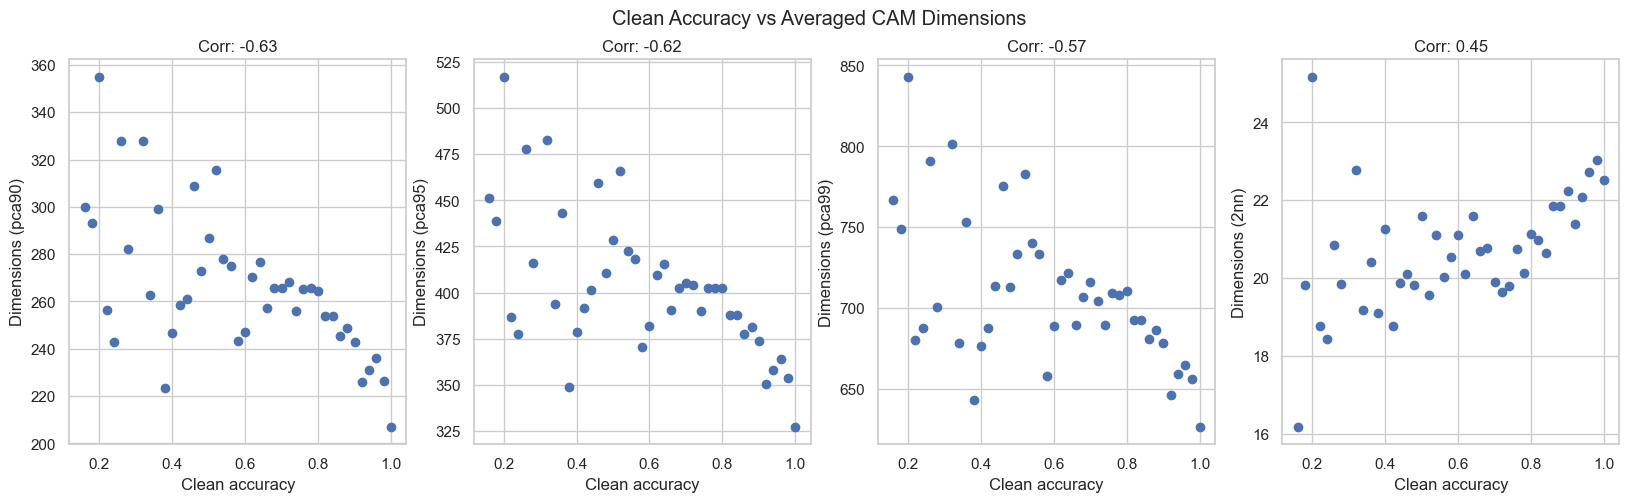

In [ ]:
# plot 3 - sameplot as above but find average of camdims for each accuracy datapoint
mean_accs_df = df.groupby(['acc_clean']).mean()
mean_accs_df = mean_accs_df.reset_index()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
x_labs = ['pca90', 'pca95', 'pca99', '2nn']
for i, ax in enumerate(axs):
    ax.scatter(mean_accs_df['acc_clean'], mean_accs_df['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('Clean accuracy')
    # pearson correlation
    corr = np.corrcoef(mean_accs_df['acc_clean'], mean_accs_df['dim_'+x_labs[i]])[0, 1]
    ax.set_title(f'Corr: {corr:.2f}')


plt.suptitle('Clean Accuracy vs Averaged CAM Dimensions')
plt.show()


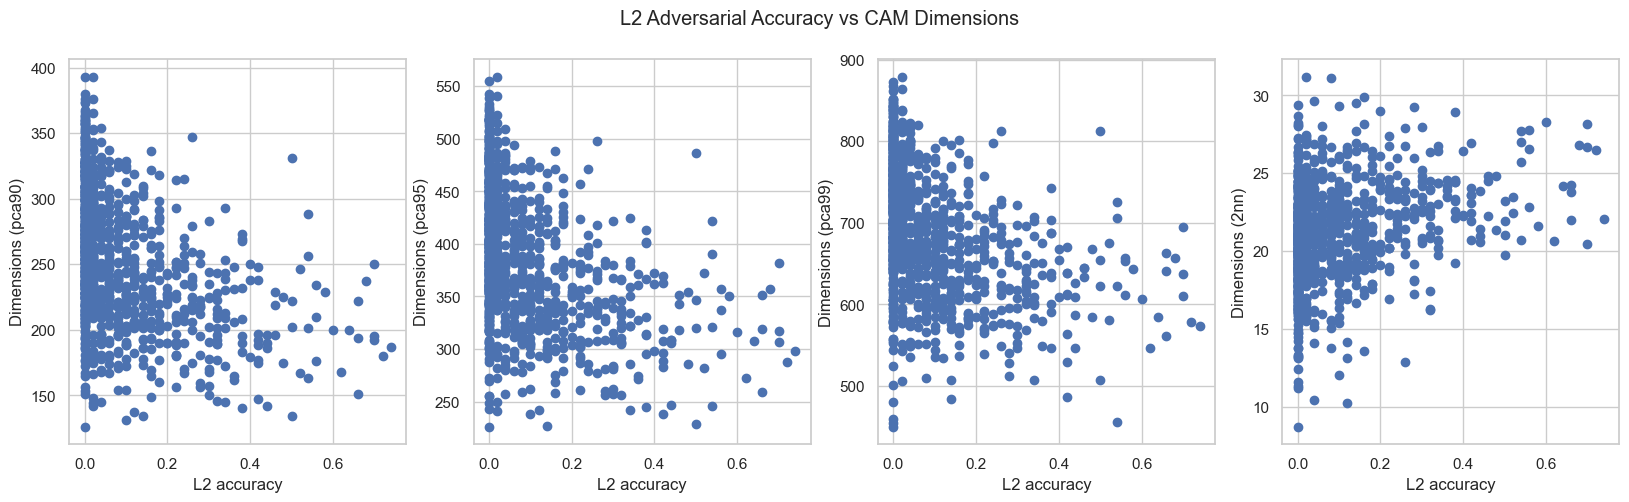

In [ ]:
# plot 4 - acc_l2 acc vs dims (pca90, pca95, pca99, pca2nn) in 4 subplots

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.scatter(df['acc_l2'], df['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('L2 accuracy')

plt.suptitle('L2 Adversarial Accuracy vs CAM Dimensions')
plt.show()

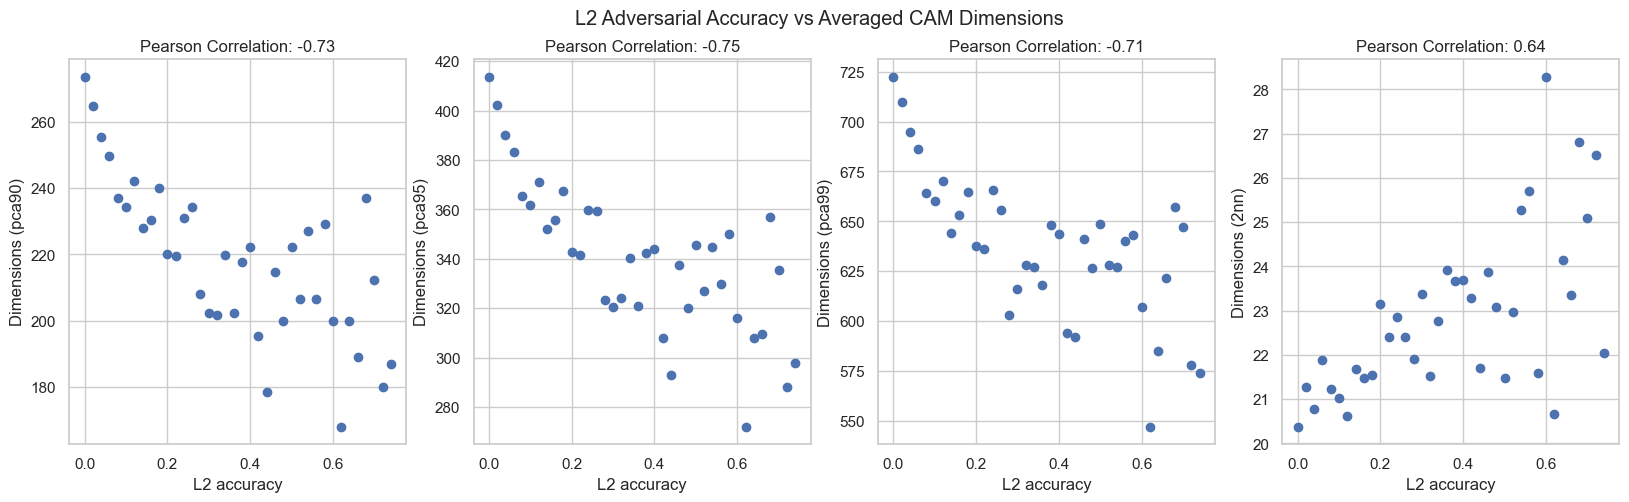

In [ ]:
avg_l2_accs = df.groupby(['acc_l2']).mean()
avg_l2_accs = avg_l2_accs.reset_index()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.scatter(avg_l2_accs['acc_l2'], avg_l2_accs['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('L2 accuracy')
    # pearson correlation
    corr = np.corrcoef(avg_l2_accs['acc_l2'], avg_l2_accs['dim_'+x_labs[i]])[0,1]
    ax.set_title(f'Pearson Correlation: {corr:.2f}')

plt.suptitle('L2 Adversarial Accuracy vs Averaged CAM Dimensions')
plt.show()

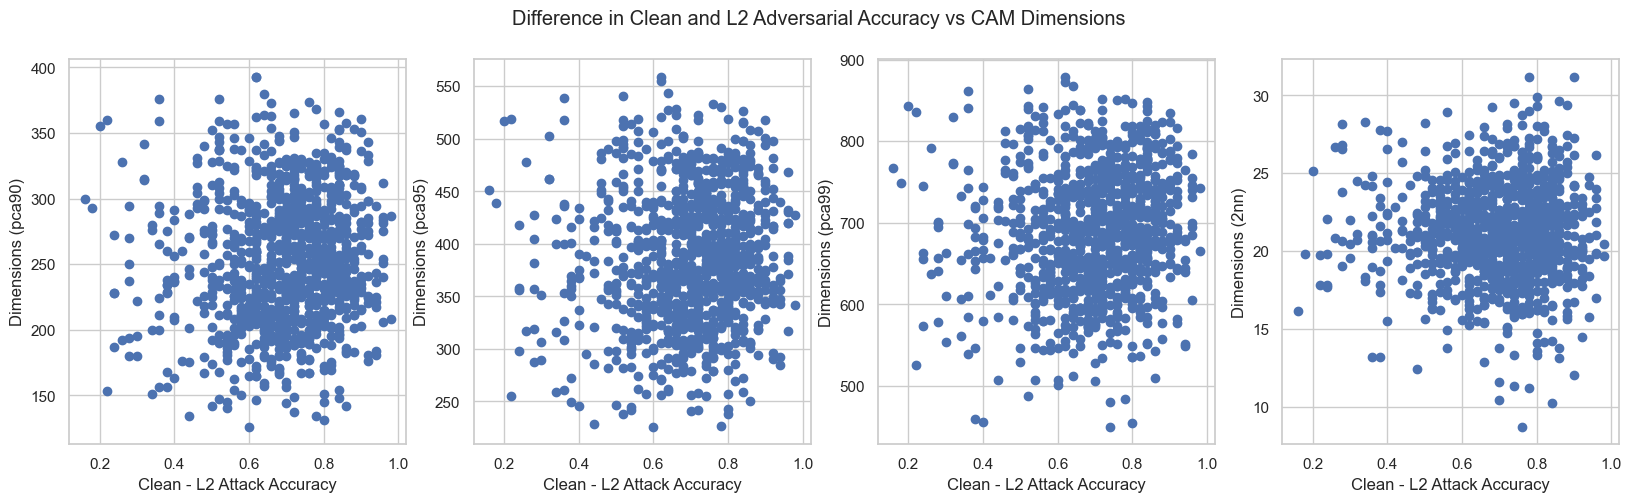

In [ ]:
clean_l2_diff = df.copy()
clean_l2_diff['diff'] = clean_l2_diff['acc_clean'] - clean_l2_diff['acc_l2']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.scatter(clean_l2_diff['diff'], clean_l2_diff['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('Clean - L2 Attack Accuracy')

plt.suptitle('Difference in Clean and L2 Adversarial Accuracy vs CAM Dimensions')
plt.show()


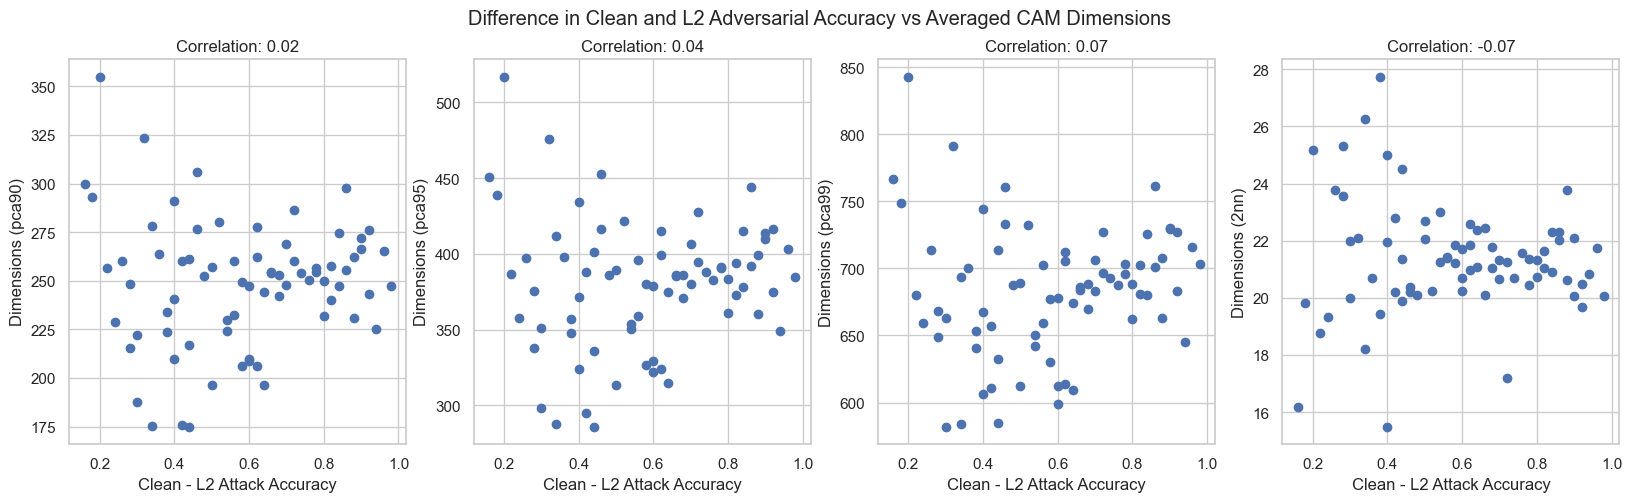

In [ ]:
avg_diff = clean_l2_diff.groupby(['diff']).mean()
avg_diff = avg_diff.reset_index()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.scatter(avg_diff['diff'], avg_diff['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('Clean - L2 Attack Accuracy')
    # pearson correlation
    corr = np.corrcoef(avg_diff['diff'], avg_diff['dim_'+x_labs[i]])[0, 1]
    ax.set_title(f'Correlation: {corr:.2f}')

plt.suptitle('Difference in Clean and L2 Adversarial Accuracy vs Averaged CAM Dimensions')
plt.show()

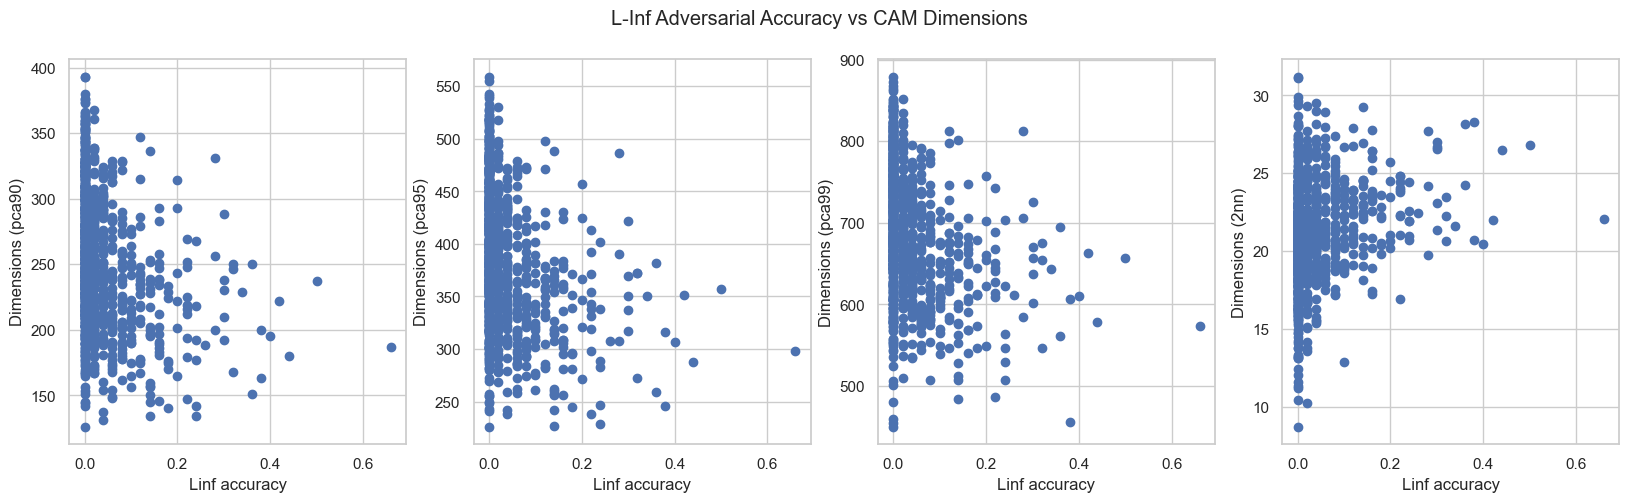

In [ ]:

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.scatter(df['acc_linf'], df['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('Linf accuracy')

plt.suptitle('L-Inf Adversarial Accuracy vs CAM Dimensions')
plt.show()

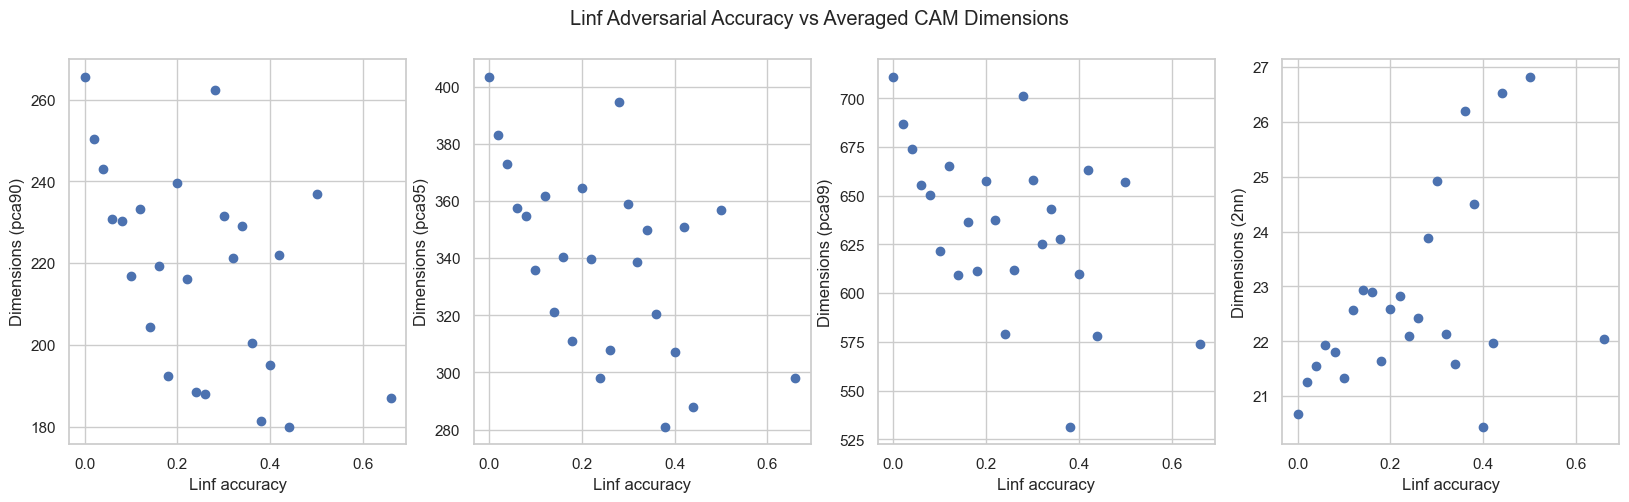

In [ ]:
avg_linf_accs = df.groupby(['acc_linf']).mean()
avg_linf_accs = avg_linf_accs.reset_index()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.scatter(avg_linf_accs['acc_linf'], avg_linf_accs['dim_'+x_labs[i]])
    ax.set_ylabel(f'Dimensions ({x_labs[i]})')
    ax.set_xlabel('Linf accuracy')
  
plt.suptitle('Linf Adversarial Accuracy vs Averaged CAM Dimensions')
plt.show()

## Classifier Performance and Within Class Covariance

In [ ]:
wc_var_path = os.path.join(data_path, f'imagenet_{model_ext}_train', f'class_wc_var_{split}.pkl')
wc_var = pickle.load(open(wc_var_path, 'rb'))


In [ ]:
# add wc_var to df
df['wc_var'] = wc_var
df

,class,acc_clean,acc_l2,acc_linf,dim_2nn,dim_pca90,dim_pca95,dim_pca99,wc_var
0,0,0.96,0.38,0.12,23.333513,232,367,688,40.75000
1,1,0.96,0.14,0.02,27.702543,284,421,726,31.31250
2,2,0.82,0.02,0.00,22.180889,211,337,644,47.96875
3,3,0.90,0.10,0.00,26.034627,214,343,658,31.31250
4,4,0.92,0.00,0.00,22.784051,226,344,642,39.43750
...,...,...,...,...,...,...,...,...,...
995,995,1.00,0.26,0.02,26.724635,225,346,638,41.15625
996,996,0.90,0.04,0.00,21.071034,226,351,639,71.68750
997,997,0.78,0.02,0.00,23.485765,232,357,654,43.81250
998,998,0.52,0.00,0.00,19.742150,292,435,740,73.31250


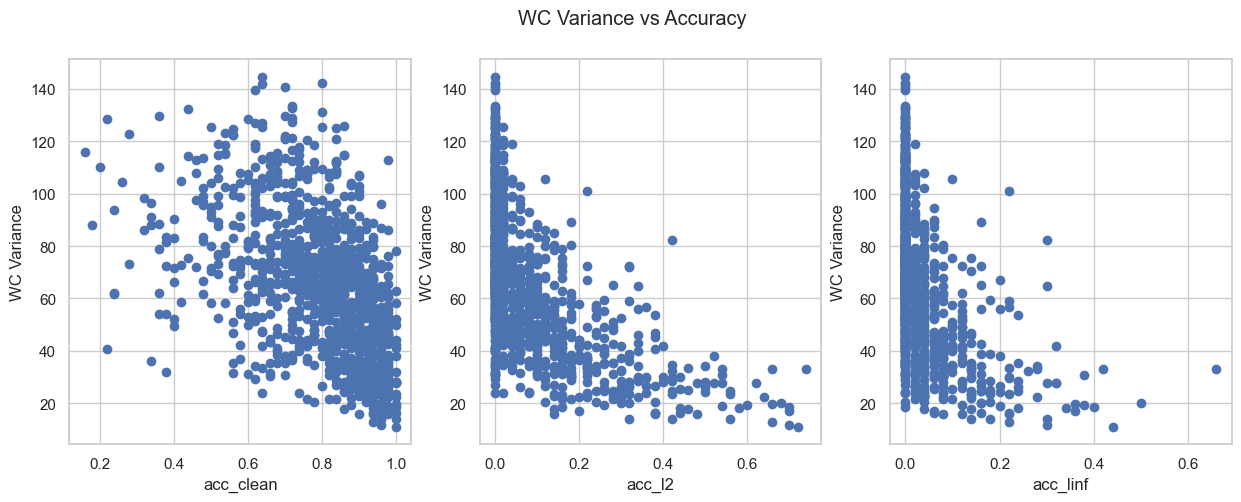

In [ ]:
# plot 5 - 3 subplots for wc_var vs acc_clean, acc_l2, acc_linf

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
x_labs = ['acc_clean', 'acc_l2', 'acc_linf']
for i, ax in enumerate(axs):
    ax.scatter(df[x_labs[i]], df['wc_var'])
    ax.set_xlabel(f'{x_labs[i]}')
    ax.set_ylabel('WC Variance')
  
plt.suptitle('WC Variance vs Accuracy')
plt.show()

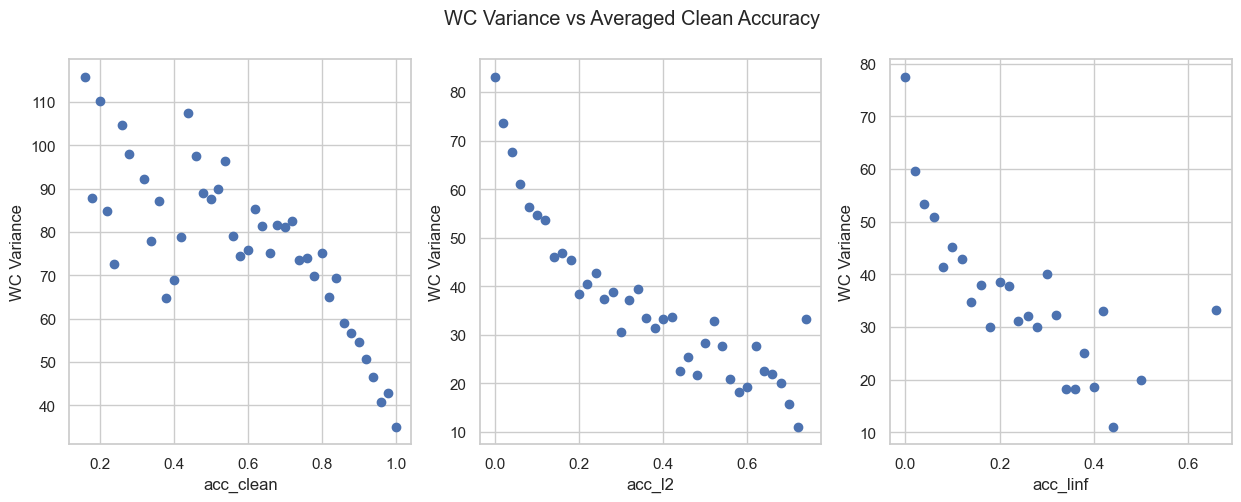

In [ ]:
# average out wc_var for each accuracy datapoint


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    mean_df = df.groupby([x_labs[i]]).mean()
    mean_df = mean_df.reset_index()
    ax.scatter(mean_df[x_labs[i]], mean_df['wc_var'])
    ax.set_ylabel('WC Variance')
    ax.set_xlabel(f'{x_labs[i]}')

plt.suptitle('WC Variance vs Averaged Clean Accuracy')
plt.show()